# Лабораторная работа 6

**Задача:** В Швейцарии 4 диалекта немецкого языка. Цель лабораторной работы -- предсказать диалект по фрагменту разговорной речи.

**Данные:**

Описание файлов:
- train.csv - обучающая выборка
- test.csv - тестовая выборка
- sampleSubmission.csv - пример результирующего файла для его сабмита на кэгл

Описание колонок:
- Id - уникальный индекс для тестовой выборки (test.csv)
- Text - фрагмент речи
- Label - целевой класс языка для конкретного фрагмента речи (train.csv)
- Prediction - предсказанный класс языка (sampleSubmission.csv)

Описание классов:

`BE Bernese
 LU Lucerne
 ZH Zurich
 BS Basel`
    
    
**Подробнее о данных:** https://www.kaggle.com/competitions/swiss-dialect-identification/data 

1. Загрузить датафреймы через pandas. Выполнить предобработку `Bag of Words`.

In [ ]:
import pandas as pd
import numpy as np
import re
from google.colab import drive
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from gensim.models import Word2Vec
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [ ]:
drive.mount('/content/drive/')

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/test.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


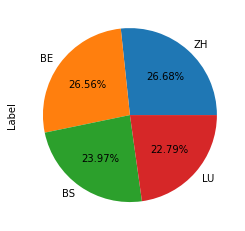

In [ ]:
train['Label'].value_counts().plot.pie(autopct='%1.2f%%')

In [ ]:
y = train.Label.values
X = train.Text.values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train)
X_train_cv = (vectorizer.transform(x_train)).toarray()
X_test_cv  = (vectorizer.transform(x_test)).toarray()
test_vect = vectorizer.transform(test[' Text'])

In [ ]:
print(vectorizer.vocabulary_)

{'hät': 5493, 'èèr': 13909, 'mit': 7460, 'miir': 7361, 'de': 2118, 'bini': 1400, 'anderthalbjärig': 753, 'gsìì': 4786, 'früener': 3581, 'alsoo': 676, 'in': 5870, 'höngg': 5577, 'zeerscht': 13247, 'das': 2106, 'isch': 6046, 'beschtimmt': 1258, 'gsi': 4763, 'für': 3759, 'französischs': 3461, 'khriegsgfangnelager': 6465, 'öschtrich': 14013, 'neaa': 8020, 'gaar': 3794, 'nüüt': 8433, 'aber': 265, 'dänn': 2604, 'di': 2245, 'diskussioon': 2322, 'choo': 1885, 'im': 5843, 'föifedriissgi': 3694, 'soziaaldemokraatisch': 10490, 'partei': 8636, 'landesvertäidigung': 6767, 'anerchänt': 770, 'und': 11400, 'sind': 10373, 'laufschrit': 6809, 'wider': 12742, 'kantonemänt': 6330, 'zruggfüert': 13368, 'woorde': 12935, 'dasch': 2107, 'auso': 931, 'ii': 5672, 'weis': 12664, 'nììd': 8269, 'si': 10299, 'oo': 8525, 'tütsche': 11146, 'seer': 10236, 'gueti': 4794, 'löösig': 7085, 'gsì': 4784, 'het': 5202, 'mer': 7306, 'eigentlech': 2826, 'nìd': 8266, 'ghöört': 4184, 'wìrkt': 13144, 'da': 2055, 'mues': 7616, 'ain

2. Обучить различные модели `Random forest`, `Gradient boosting`, `SGD classifier` и тд (можно попробовать полносвязную нейронную сеть), снять метрику `accuracy` на валидационных данных.

In [ ]:
def train_model(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  predicted = model.predict(X_test)
  print(classification_report(predicted, y_test))
  print(accuracy_score(predicted, y_test))

In [ ]:
model_sgd = SGDClassifier()
train_model(model_sgd, X_train_cv, y_train, X_test_cv, y_test)

              precision    recall  f1-score   support

          BE       0.84      0.77      0.80       896
          BS       0.77      0.82      0.79       683
          LU       0.74      0.86      0.79       622
          ZH       0.87      0.80      0.83       923

    accuracy                           0.81      3124
   macro avg       0.80      0.81      0.81      3124
weighted avg       0.81      0.81      0.81      3124

0.807618437900128


In [ ]:
model_logreg = LogisticRegression()
train_model(model_logreg, X_train_cv, y_train, X_test_cv, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

          BE       0.85      0.74      0.79       951
          BS       0.75      0.82      0.78       660
          LU       0.71      0.88      0.79       587
          ZH       0.87      0.79      0.83       926

    accuracy                           0.80      3124
   macro avg       0.79      0.81      0.80      3124
weighted avg       0.81      0.80      0.80      3124

0.7996158770806658


In [ ]:
model_forest = RandomForestClassifier()
train_model(model_forest, X_train_cv, y_train, X_test_cv, y_test)

              precision    recall  f1-score   support

          BE       0.81      0.64      0.72      1041
          BS       0.63      0.74      0.68       609
          LU       0.57      0.81      0.67       507
          ZH       0.80      0.70      0.74       967

    accuracy                           0.71      3124
   macro avg       0.70      0.72      0.70      3124
weighted avg       0.73      0.71      0.71      3124

0.7074263764404609


In [ ]:
model_tree = DecisionTreeClassifier()
train_model(model_tree, X_train_cv, y_train, X_test_cv, y_test)

              precision    recall  f1-score   support

          BE       0.69      0.60      0.65       950
          BS       0.59      0.60      0.59       710
          LU       0.53      0.69      0.60       568
          ZH       0.71      0.67      0.68       896

    accuracy                           0.64      3124
   macro avg       0.63      0.64      0.63      3124
weighted avg       0.64      0.64      0.64      3124

0.635403329065301


3. Выполнить предобработку `tf-idf`, поварировать параметры предобработки. Обучить модели. Как изменилось качество моделей с предобработкой `Bag of words` и `tf-idf`?

In [ ]:
tfidconverter = TfidfVectorizer()
tfidconverter.fit(x_train)
X_train_tf = (tfidconverter.transform(x_train)).toarray()
X_test_tf  = (tfidconverter.transform(x_test)).toarray()
test_tf = tfidconverter.transform(test[' Text'])

In [ ]:
model_sgd2 = SGDClassifier()
train_model(model_sgd2, X_train_tf, y_train, X_test_tf, y_test)

              precision    recall  f1-score   support

          BE       0.84      0.78      0.81       885
          BS       0.74      0.81      0.78       664
          LU       0.73      0.85      0.79       620
          ZH       0.88      0.78      0.83       955

    accuracy                           0.80      3124
   macro avg       0.80      0.81      0.80      3124
weighted avg       0.81      0.80      0.80      3124

0.8018565941101152


4. Подумать как могут н-граммы слов или символов улучшить результата для предсказания языка. Попробовать составить токены n-gramm слов или символов и обучить выбранные модели на них. 

In [ ]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> punkt


      Unzipping tokenizers/punkt.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Unzipping corpora/stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
train['tokenized'] = train.apply(lambda row: word_tokenize(row['Text']), axis=1)
stopw = stopwords.words('german')
train['stopped'] = [i for i in train['tokenized'] if not i in stopw]

len_tokens = []
word_tokens = train['tokenized']
for i in range(len(word_tokens)):
  len_tokens.append(len(word_tokens[i]))

train['n_tokens'] = len_tokens

In [ ]:
train.head()

,Text,Label,tokenized,stopped,n_tokens
0,immer min maa mit em vatter vergliche de,ZH,"[immer, min, maa, mit, em, vatter, vergliche, de]","[immer, min, maa, mit, em, vatter, vergliche, de]",8
1,das mues ich säge aber mir hend,LU,"[das, mues, ich, säge, aber, mir, hend]","[das, mues, ich, säge, aber, mir, hend]",7
2,därartigi het natürlig ineren organisazion gän...,BS,"[därartigi, het, natürlig, ineren, organisazio...","[därartigi, het, natürlig, ineren, organisazio...",7
3,schtei und bei gfroore e moondschiinnacht,BE,"[schtei, und, bei, gfroore, e, moondschiinnacht]","[schtei, und, bei, gfroore, e, moondschiinnacht]",6
4,deet si jä,BS,"[deet, si, jä]","[deet, si, jä]",3


In [ ]:
y = train.Label.values
X = train.Text.values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

tfidconverter = TfidfVectorizer()
tfidconverter.fit(x_train)
X_train_tf = (tfidconverter.transform(x_train)).toarray()
X_test_tf  = (tfidconverter.transform(x_test)).toarray()
test_tf = tfidconverter.transform(test[' Text'])

In [ ]:
model_sgd3 = SGDClassifier()
train_model(model_sgd3, X_train_tf, y_train, X_test_tf, y_test)

              precision    recall  f1-score   support

          BE       0.83      0.79      0.81       871
          BS       0.76      0.80      0.78       688
          LU       0.74      0.86      0.79       624
          ZH       0.88      0.79      0.83       941

    accuracy                           0.80      3124
   macro avg       0.80      0.81      0.80      3124
weighted avg       0.81      0.80      0.81      3124

0.8047375160051217


5. Отправить лучший результат на https://www.kaggle.com/competitions/swiss-dialect-identification/overview

In [ ]:
#res = model_sgd.predict(test_tf)
#submission = pd.DataFrame({"Id": test['Id'],"Prediction": res})
#submission.to_csv('/content/drive/MyDrive/Colab Notebooks/submission_lab6_2.csv', index=False)

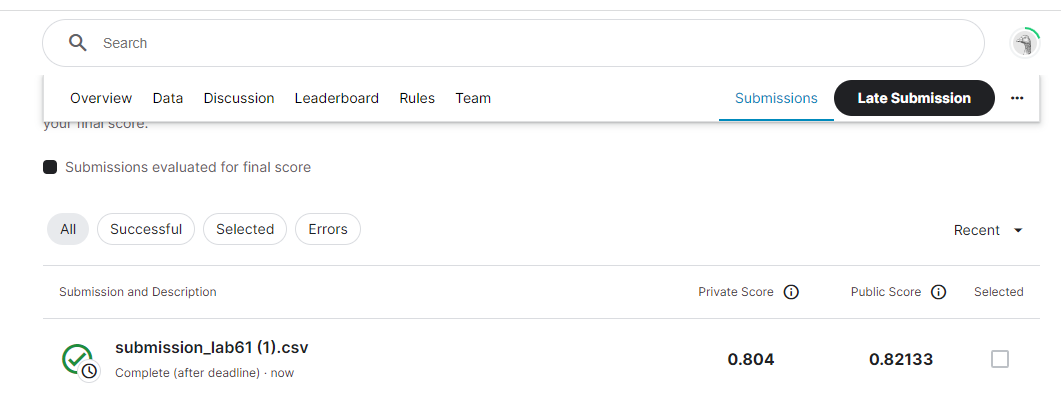

Help links:

- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
- https://www.nltk.org/api/nltk.lm.html
- https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92